<a href="https://colab.research.google.com/github/HarikaSuryam/HomeAssignments/blob/main/BonusAssignment_HarikaVinjamuri_700769273.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bonus Assignment

Student Name - Harika Vinjamuri

Student Id - 700769273

In [2]:
# pip install transformers torch

In [3]:
from transformers import pipeline

# Create a QA pipeline with the default model
qa_pipeline = pipeline("question-answering")

# Providing a context and ask a question
context = "Charles Babbage is known as the father of the computer. He designed the Analytical Engine in the 19th century."
question = "Who is known as the father of the computer?"

# Printing the answer
result = qa_pipeline(question=question, context=context)
print("Default Model Output:", result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


Default Model Output: {'score': 0.9978353977203369, 'start': 0, 'end': 15, 'answer': 'Charles Babbage'}


In [4]:
# Loading the pipeline with a specific model
custom_qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

# Running the QA task again
custom_result = custom_qa_pipeline(question=question, context=context)
print("Custom Model Output:", custom_result)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


Custom Model Output: {'score': 0.9871322512626648, 'start': 0, 'end': 15, 'answer': 'Charles Babbage'}


In [7]:
# Custom context
my_context = (
    "Ada Lovelace was a mathematician and writer who is considered the first computer programmer. "
    "She worked with Charles Babbage on the Analytical Engine, providing the first algorithm intended to be processed by a machine."
)

# Question 1
q1 = "Who is considered the first computer programmer?"
q1_result = custom_qa_pipeline(question=q1, context=my_context)
print("Q1 Result:", q1_result)

# Question 2
q2 = "Who did Ada Lovelace work with?"
q2_result = custom_qa_pipeline(question=q2, context=my_context)
print("Q2 Result:", q2_result)


Q1 Result: {'score': 0.9878064393997192, 'start': 0, 'end': 12, 'answer': 'Ada Lovelace'}
Q2 Result: {'score': 0.9773377776145935, 'start': 109, 'end': 124, 'answer': 'Charles Babbage'}


Epoch 1/10 | D Loss: 0.0266 | G Loss: 7.9438
Epoch 2/10 | D Loss: 0.0963 | G Loss: 12.1151
Epoch 3/10 | D Loss: 0.0511 | G Loss: 11.8526
Epoch 4/10 | D Loss: 0.2634 | G Loss: 4.7735
Epoch 5/10 | D Loss: 0.0566 | G Loss: 14.7144
Epoch 6/10 | D Loss: 0.0804 | G Loss: 20.7986
Epoch 7/10 | D Loss: 0.1363 | G Loss: 11.1344
Epoch 8/10 | D Loss: 0.2784 | G Loss: 8.3954
Epoch 9/10 | D Loss: 0.1613 | G Loss: 17.3402
Epoch 10/10 | D Loss: 0.1396 | G Loss: 11.2740


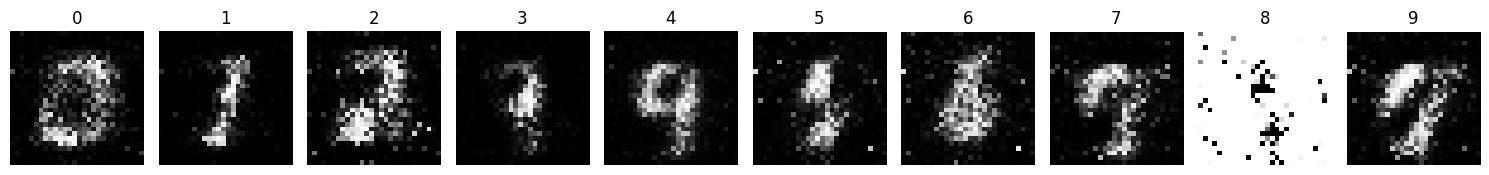

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

latent_dim = 100
num_classes = 10
img_shape = (1, 28, 28)
batch_size = 64
epochs = 10

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + num_classes, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, int(torch.prod(torch.tensor(img_shape)))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        input = torch.cat((noise, self.label_emb(labels)), dim=1)
        out = self.model(input)
        return out.view(out.size(0), *img_shape)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_emb = nn.Embedding(num_classes, num_classes)
        self.model = nn.Sequential(
            nn.Linear(num_classes + int(torch.prod(torch.tensor(img_shape))), 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        input = torch.cat((img.view(img.size(0), -1), self.label_emb(labels)), dim=1)
        return self.model(input)


# Preparing the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
mnist = datasets.MNIST(root=".", train=True, download=True, transform=transform)
loader = DataLoader(mnist, batch_size=batch_size, shuffle=True)


# Training the cGAN
generator = Generator().to(device)
discriminator = Discriminator().to(device)

loss_fn = nn.BCELoss()
opt_G = optim.Adam(generator.parameters(), lr=0.0002)
opt_D = optim.Adam(discriminator.parameters(), lr=0.0002)

for epoch in range(epochs):
    for imgs, labels in loader:
        batch = imgs.size(0)
        imgs, labels = imgs.to(device), labels.to(device)

        real = torch.ones(batch, 1).to(device)
        fake = torch.zeros(batch, 1).to(device)

        # ---------------------
        #  Train Generator
        # ---------------------
        opt_G.zero_grad()
        z = torch.randn(batch, latent_dim).to(device)
        gen_labels = torch.randint(0, num_classes, (batch,), device=device)
        gen_imgs = generator(z, gen_labels)
        validity = discriminator(gen_imgs, gen_labels)
        g_loss = loss_fn(validity, real)
        g_loss.backward()
        opt_G.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------
        opt_D.zero_grad()
        real_loss = loss_fn(discriminator(imgs, labels), real)
        fake_loss = loss_fn(discriminator(gen_imgs.detach(), gen_labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        opt_D.step()

    print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

# Visualize the data
def generate_by_label():
    z = torch.randn(10, latent_dim).to(device)
    labels = torch.arange(0, 10).to(device)
    gen_imgs = generator(z, labels).cpu().detach()

    fig, axs = plt.subplots(1, 10, figsize=(15, 2))
    for i in range(10):
        axs[i].imshow(gen_imgs[i].squeeze(), cmap="gray")
        axs[i].axis("off")
        axs[i].set_title(str(i))
    plt.tight_layout()
    plt.show()

generate_by_label()


# Feature	Vanilla

Input to Generator	- Random noise vector z
Discriminator Input	- Real or fake image
Output	- Uncontrolled/random generation
Control	- No control over generated class/content

# GAN	Conditional GAN (cGAN)

Input to Generator	- Random noise vector z + conditional label y
Discriminator Input	- Image + corresponding label y
Output	- Label-specific generation (e.g., generate a "5" digit)
Control	- Fine control via conditional input (class, text, etc.)

Conditioning allows the model to generate outputs based on specific, desired attributes rather than random guesses.

A popular use of Conditional GANs is in face generation, like in the CelebA dataset, where each image includes attributes such as:

*   Smiling
*   Wearing glasses
*   Gender
*   Hair Color

With a cGAN, you can generate a face with specific attributes, such as - “Generate a female face with black hair and glasses, smiling.”

In an image-to-image GAN, the discriminator learns to distinguish whether the generated image is a realistic and accurate translation of the input image.

Pairing is important because it teaches the model the correct mapping between input and output, ensuring the generated image aligns with the input’s structure and content.